# August Perez Capstone Three Project:
## Characterization of High Accident Situations

Using neural networks / deep learning I plan on analyzing a conglomerate dataset to characterize what combined variables of road types, times, and conditions have the highest probability of a car accident occuring.

### Goal
Build models for characterization of locations with crash probability of >=80% (or top 10 if minimal quantity of >=80% crash probability)
and an analysis of times, days of the week, and dates of the year with crash probability >=60% for the locations characterized.

    Crash probability Thresholds chosen arbitrarily. For real-world application, each agency utilizing this needs to determine thresholds specific to their needs and capabilities.

### Data source:
Accidents in France from 2005 to 2016 (https://www.kaggle.com/datasets/ahmedlahlou/accidents-in-france-from-2005-to-2016/data)


    
#### About the dataset:
- A collection of 5 datasets pertaining to car crashes in France from 2005 to 2016
    - characteristics
        - Details about each crash
    - holidays
        - Dates from 2005 to 2016 that are holidays
    - places
        - Details about accident locations
    - users
        - Details about persons involved in the accident
    - vehicles
        - Details about vehicles involved in the accident

## Note on raw format cells:

Actions outside the initial scope of data wrangling and EDA were performed. The cells with this code are converted to Raw format so the code does not execute & is preserved for back-referencing.

## Imports:

In [157]:
%matplotlib inline

# data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import datetime as dt

# plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# modeling & pre-processing
    #commenting out since not necessary for this part of the project
#    import sklearn.model_selection
#    from sklearn.model_selection import train_test_split
#    from sklearn.model_selection import KFold
#    import sklearn.preprocessing
#    import sklearn.metrics

import warnings
    #reminder code so I can ignore warnings for single code cells:
    #warnings.filterwarnings('ignore')
    #warnings.resetwarnings()

### Set random seed for reproducability
Note that this should not be done for models used in real-world applications

In [3]:
np.random.seed(9)

## Load the data into a pandas df's

### Column Descriptions
Large section. Suggested to keep collapsed.

CARACTERISTICS :

**Num_Acc** : Accident ID

jour : Day of the accident

mois : Month of the accident

an : Year of the accident

hrmn : Time of the accident in hour and minutes (hhmm)

**lum** : Lighting : lighting conditions in which the accident occurred

    1 - Full day

    2 - Twilight or dawn

    3 - Night without public lighting

    4 - Night with public lighting not lit

    5 - Night with public lighting on

dep : Departmeent : INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed
by a 0 (201 Corse-du-Sud - 202 Haute-Corse)

com : Municipality: The commune number is a code given by INSEE. The code has 3 numbers set to the right.

**Localisation (agg)** :

    1 - Out of agglomeration

    2 - In built-up areas

**int** : Type of Intersection :

    1 - Out of intersection

    2 - Intersection in X

    3 - Intersection in T

    4 - Intersection in Y

    5 - Intersection with more than 4 branches

    6 - Giratory

    7 - Place

    8 - Level crossing

    9 - Other intersection

**atm** : Atmospheric conditions:

    1 - Normal

    2 - Light rain

    3 - Heavy rain

    4 - Snow - hail

    5 - Fog - smoke

    6 - Strong wind - storm

    7 - Dazzling weather

    8 - Cloudy weather

    9 - Other

**col** : Type of collision:

    1 - Two vehicles - frontal

    2 - Two vehicles - from the rear

    3 - Two vehicles - by the side

    4 - Three vehicles and more - in chain

    5 - Three or more vehicles - multiple collisions

    6 - Other collision

    7 - Without collision

adr : Postal address: variable filled in for accidents occurring in built-up areas

gps : GPS coding: 1 originator character:

    M = Métropole

    A = Antilles (Martinique or Guadeloupe)

    G = Guyane

    R = Réunion

    Y = Mayotte

Geographic coordinates in decimal degrees:

    lat : Latitude

    long : Longitude

Places:

Num_Acc : Accident ID

**catr** : Category of road:

    1 - Highway

    2 - National Road

    3 - Departmental Road

    4 - Communal Way

    5 - Off public network

    6 - Parking lot open to public traffic

    9 - other

voie : Road Number

V1: Numeric index of the route number (example: 2 bis, 3 ter etc.)

V2: Letter alphanumeric index of the road

**circ**: Traffic regime:

    1 - One way

    2 - Bidirectional

    3 - Separated carriageways

    4 - With variable assignment channels

**nbv**: Total number of traffic lanes

**vosp**: Indicates the existence of a reserved lane, regardless of whether or not the accident occurs on that lane.

    1 - Bike path

    2 - Cycle Bank

    3 - Reserved channel

**Prof**: Longitudinal profile describes the gradient of the road at the accident site

    1 - Dish

    2 - Slope

    3 - Hilltop

    4- Hill bottom

pr: Home PR number (upstream terminal number)

pr1: Distance in meters to the PR (relative to the upstream terminal)

**plan**: Drawing in plan:

    1 - Straight part

    2 - Curved on the left

    3 - Curved right

    4 - In "S"

**lartpc**: Central solid land width (TPC) if there is

**larrout**: Width of the roadway assigned to vehicle traffic are not included the emergency stop strips,
CPRs and parking spaces

**surf**: surface condition

    1 - normal

    2 - wet

    3 - puddles

    4 - flooded

    5 - snow

    6 - mud

    7 - icy

    8 - fat - oil

    9 - other

**infra**: Development - Infrastructure:

    1 - Underground - tunnel

    2 - Bridge - autopont

    3 - Exchanger or connection brace

    4 - Railway

    5 - Carrefour arranged

    6 - Pedestrian area

    7 - Toll zone

**situ**: Situation of the accident:

    1 - On the road

    2 - On emergency stop band

    3 - On the verge

    4 - On the sidewalk

    5 - On bike path

env1: school point: near a school

USERS:

Acc_number: Accident identifier.

Num_Veh: Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are
attached to the vehicles that hit them)

place: Allows to locate the place occupied in the vehicle by the user at the time of the accident

catu: User category:

    1 - Driver

    2 - Passenger

    3 - Pedestrian

    4 - Pedestrian in rollerblade or scooter

grav: Severity of the accident: The injured users are classified into three categories of victims plus the uninjured

    1 - Unscathed

    2 - Killed

    3 - Hospitalized wounded

    4 - Light injury

sex: Sex of the user

    1 - Male

    2 - Female

Year_on: Year of birth of the user

trip: Reason for traveling at the time of the accident:

    1 - Home - work

    2 - Home - school

    3 - Shopping - Shopping

    4 - Professional use

    5 - Promenade - leisure

    9 - Other

secu: on 2 characters:
the first concerns the existence of a safety equipment

    1 - Belt

    2 - Helmet

    3 - Children's device

    4 - Reflective equipment

    9 - Other

the second is the use of Safety Equipment

    1 - Yes

    2 - No

    3 - Not determinable

locp: Location of the pedestrian:

On pavement:

    1 - A + 50 m from the pedestrian crossing

    2 - A - 50 m from the pedestrian crossing

On pedestrian crossing:

    3 - Without light signaling

    4 - With light signaling

Various:

    5 - On the sidewalk

    6 - On the verge

    7 - On refuge or BAU

    8 - On against aisle

actp: Action of the pedestrian:

Moving

    0 - not specified or not applicable

    1 - Meaning bumping vehicle

    2 - Opposite direction of the vehicle
    Various

    3 - Crossing

    4 - Masked

    5 - Playing - running

    6 - With animal

    9 - Other

etatp: This variable is used to specify whether the injured pedestrian was alone or not

    1 - Only

    2 - Accompanied

    3 - In a group

VEHICLES:

Num_Acc
Accident ID

Num_Veh
Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are
attached to vehicles that hit them) - alphanumeric code

GP
Flow direction :

    1 - PK or PR or increasing postal address number

    2 - PK or PR or descending postal address number

CATV
Category of vehicle:

    01 - Bicycle

    02 - Moped <50cm3

    03 - Cart (Quadricycle with bodied motor) (formerly "cart or motor tricycle")

    04 - Not used since 2006 (registered scooter)

    05 - Not used since 2006 (motorcycle)

    06 - Not used since 2006 (side-car)

    07 - VL only

    08 - Not used category (VL + caravan)

    09 - Not used category (VL + trailer)

    10 - VU only 1,5T <= GVW <= 3,5T with or without trailer (formerly VU only 1,5T <= GVW <= 3,5T)

    11 - Most used since 2006 (VU (10) + caravan)

    12 - Most used since 2006 (VU (10) + trailer)

    13 - PL only 3,5T


### Characteristics Data

In [4]:
#AP: To get encoding of the csv since it's not the default (because French source of data)
with open(r'Datasets_cap3\characteristics.csv') as f:
    print(f)

<_io.TextIOWrapper name='Datasets_cap3\\characteristics.csv' mode='r' encoding='cp1252'>


In [5]:
df_char = pd.read_csv(r'Datasets_cap3\characteristics.csv', skip_blank_lines=True, encoding='cp1252', encoding_errors='ignore', low_memory=False)

In [6]:
#AP: Should have 839,985 rows, based on looking at csv
print(len(df_char))

839985


### holidays Data

In [7]:
#AP: To get encoding of the csv since it's not the default (because French source of data)
with open(r'Datasets_cap3\holidays.csv') as f:
    print(f)

<_io.TextIOWrapper name='Datasets_cap3\\holidays.csv' mode='r' encoding='cp1252'>


In [8]:
df_holiday = pd.read_csv(r'Datasets_cap3\holidays.csv', skip_blank_lines=True, encoding='cp1252', encoding_errors='ignore', low_memory=False)

In [9]:
#AP: Should have 132 rows, based on looking at csv
print(len(df_holiday))

132


### places Data

In [10]:
#AP: To get encoding of the csv since it's not the default (because French source of data)
with open(r'Datasets_cap3\places.csv') as f:
    print(f)

<_io.TextIOWrapper name='Datasets_cap3\\places.csv' mode='r' encoding='cp1252'>


In [11]:
df_places = pd.read_csv(r'Datasets_cap3\places.csv', skip_blank_lines=True, encoding='cp1252', encoding_errors='ignore', low_memory=False)

In [12]:
#AP: Should have 839,985 rows, based on looking at csv
print(len(df_places))

839985


### users Data

Had to rename file to 'crash_users.csv' from 'users.csv'because of unicode escape character error

In [13]:
#AP: To get encoding of the csv since it's not the default (because French source of data)
with open(r'Datasets_cap3\crash_users.csv') as f:
    print(f)

<_io.TextIOWrapper name='Datasets_cap3\\crash_users.csv' mode='r' encoding='cp1252'>


In [14]:
df_users = pd.read_csv(r'Datasets_cap3\crash_users.csv', skip_blank_lines=True, encoding='cp1252', encoding_errors='ignore', low_memory=False)

In [15]:
#AP: Should have about 1.88 million rows, based on kaggle stats
print(len(df_users))

1876005


### vehicles Data

Had to rename file to 'crash_vehicles.csv' from 'ehicles.csv'because of unicode character error

AP: **Not using this dataset**. Research into each of the features suggests to me that they would not be beneficial in characterizing crash locations for purposes of predicting where they might occur.

If investigation into this data is needed, convert the cells back to code cells (currently as Raw so the code doesn't execute)

# Data Wrangling

**Data Wrangling Steps:** (Unordered list)

- Naming conventions (cols & values)
- Outliers
- nulls
    - Check for null replacements (i.e. "99", "0", etc.)
- duplicates
- Value consistency
- 

DF var names:
- df_char
    - (characteristics)
- df_holiday
    - (holidays)
- df_places
    - (places)
- df_users
    - (users)
- df_vehicles
    - (vehicles)

## Initial Exploration

In [16]:
df_char.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [17]:
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


In [18]:
df_holiday.head()

,ds,holiday
0,2005-01-01,New year
1,2005-03-28,Easter Monday
2,2005-05-01,Labour Day
3,2005-05-05,Ascension Thursday
4,2005-05-08,Victory in Europe Day


In [19]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ds       132 non-null    object
 1   holiday  132 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [20]:
df_places.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [21]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   voie     780914 non-null  object 
 3   v1       332816 non-null  float64
 4   v2       33953 non-null   object 
 5   circ     839187 non-null  float64
 6   nbv      838195 non-null  float64
 7   pr       414770 non-null  float64
 8   pr1      413463 non-null  float64
 9   vosp     838345 non-null  float64
 10  prof     838924 non-null  float64
 11  plan     838909 non-null  float64
 12  lartpc   830440 non-null  float64
 13  larrout  831706 non-null  float64
 14  surf     838968 non-null  float64
 15  infra    838707 non-null  float64
 16  situ     838983 non-null  float64
 17  env1     838709 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 115.4+ MB


In [22]:
df_users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876005 entries, 0 to 1876004
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   place    float64
 2   catu     int64  
 3   grav     int64  
 4   sexe     int64  
 5   trajet   float64
 6   secu     float64
 7   locp     float64
 8   actp     float64
 9   etatp    float64
 10  an_nais  float64
 11  num_veh  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 171.8+ MB


## Naming conventions
cols & values

For clarity & some translation from French

Making new col names with orginal appended at end (for my own ease when referring to dataset documentation)

### df_char

In [24]:
df_char.head(2)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590


In [25]:
df_char.rename({'Num_Acc' : 'acc_id',
                'an' : 'year_an',
                'mois' : 'month_mois',
                'jour' : 'day_jour',
                'hrmn' : 'hrmn',
                'lum' : 'luminosity_lum',
                'agg' : 'built_up_agg',
                'int' : 'intersection_type_int',
                'atm' : 'weather_atm',
                'col' : 'collision_type_col',
                'adr' : 'address_drop',
                'gps' : 'gps_drop',
                'lat' : 'latitude_drop',
                'long' : 'longitude_drop',
                'dep' : 'dep_drop',
                'com' : 'commune_num_drop'},
               axis=1, inplace=True)
df_char.head(2)

,acc_id,year_an,month_mois,day_jour,hrmn,luminosity_lum,built_up_agg,intersection_type_int,weather_atm,collision_type_col,commune_num_drop,address_drop,gps_drop,latitude_drop,longitude_drop,dep_drop
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590


### df_holiday

In [26]:
df_holiday.head(2)

,ds,holiday
0,2005-01-01,New year
1,2005-03-28,Easter Monday


In [27]:
list(df_holiday.holiday.unique())

['New year',
 'Easter Monday',
 'Labour Day',
 'Ascension Thursday',
 'Victory in Europe Day',
 'Whit Monday',
 'Bastille Day',
 'Assumption of Mary to Heaven',
 'All Saints Day',
 'Armistice Day',
 'Christmas Day']

#AP: Note that these are French holidays, keeping since this dataset is about French crashes

In [28]:
df_holiday.rename({'ds' : 'date'}, axis=1, inplace=True)
print(list(df_holiday.columns))

['date', 'holiday']


### df_places

In [29]:
df_places.sample(2)

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
448123,200900013184,3.0,900,NaN,NaN,2.0,2.0,34.0,293.0,0.0,1.0,2.0,0.0,54.0,1.0,0.0,3.0,99.0
451153,200900016214,4.0,0,NaN,NaN,3.0,2.0,5.0,0.0,0.0,1.0,1.0,15.0,70.0,1.0,0.0,1.0,99.0


In [30]:
df_places.env1.value_counts()

env1
0.0     477933
99.0    319986
3.0      40790
Name: count, dtype: int64

In [31]:
df_places.rename({'Num_Acc' : 'acc_id',
                  'catr' : 'road_category_catr',
                  'voie' : 'road_num_drop',
                  'v1' : 'v1_drop',
                  'v2' : 'v2_drop',
                  'circ' : 'road_type_circ',
                  'nbv' : 'lane_count_nbv',
                  'vosp' : 'reserved_lane_type_vosp',
                  'prof' : 'road_slope_prof',
                  'pr' : 'pr_drop',
                  'pr1' : 'pr1_drop',
                  'plan' : 'road_curvature_plan',
                  'lartpc' : 'central_sep_width_lartpc',
                  'larrout' : 'road_width_larrout',
                  'surf' : 'surface_cond_surf',
                  'infra' : 'infrastructure_infra',
                  'situ' : 'crash_location_situ',
                  'env1' : 'env1_drop'}, axis=1, inplace=True)
print(list(df_places.columns))

['acc_id', 'road_category_catr', 'road_num_drop', 'v1_drop', 'v2_drop', 'road_type_circ', 'lane_count_nbv', 'pr_drop', 'pr1_drop', 'reserved_lane_type_vosp', 'road_slope_prof', 'road_curvature_plan', 'central_sep_width_lartpc', 'road_width_larrout', 'surface_cond_surf', 'infrastructure_infra', 'crash_location_situ', 'env1_drop']


In [32]:
df_places.head(2)

,acc_id,road_category_catr,road_num_drop,v1_drop,v2_drop,road_type_circ,lane_count_nbv,pr_drop,pr1_drop,reserved_lane_type_vosp,road_slope_prof,road_curvature_plan,central_sep_width_lartpc,road_width_larrout,surface_cond_surf,infrastructure_infra,crash_location_situ,env1_drop
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0


dropping env1 because values don't make sense and no var of that name in documentation from French Gov.t

### df_users

In [33]:
df_users.head(2)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01


In [34]:
df_users.rename({'Num_Acc' : 'acc_id',
                 'num_veh' : 'num_veh_drop',
                 'place' : 'place_in_veh_place',
                 'catu' : 'person_cat_catu',
                 'grav' : 'injury_severity_grav',
                 'sexe' : 'sexe_drop',
                 'trajet' : 'travel_reason_trajet',
                 'secu' : 'secu_drop',
                 'locp' : 'ped_location_locp',
                 'actp' : 'ped_action_actp',
                 'etatp' : 'ped_group_etatp',
                 'an_nais' : 'an_nais_drop'}, axis=1, inplace=True)
print(list(df_users.columns))

['acc_id', 'place_in_veh_place', 'person_cat_catu', 'injury_severity_grav', 'sexe_drop', 'travel_reason_trajet', 'secu_drop', 'ped_location_locp', 'ped_action_actp', 'ped_group_etatp', 'an_nais_drop', 'num_veh_drop']


In [35]:
df_users.head(2)

,acc_id,place_in_veh_place,person_cat_catu,injury_severity_grav,sexe_drop,travel_reason_trajet,secu_drop,ped_location_locp,ped_action_actp,ped_group_etatp,an_nais_drop,num_veh_drop
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01


### df_vehicles
This data won't be used in this project.

Keeping code for possible back reference

## Drop unneeded cols

Dropping cols that I am reasonably sure **would not benefit characterization of accident locations or date/time analysis** for the use of preemptively deploying resources/personnel

ex. year of birth may have an effect on probability of a crash but agencies are unable to pre-screen drivers before they get on the road or determine the exact route the driver will take

In [36]:
df_char.drop(['commune_num_drop', 'address_drop', 'gps_drop', 'latitude_drop', 'longitude_drop', 'dep_drop'], axis=1, inplace=True, errors= 'ignore')
print(list(df_char.columns))

['acc_id', 'year_an', 'month_mois', 'day_jour', 'hrmn', 'luminosity_lum', 'built_up_agg', 'intersection_type_int', 'weather_atm', 'collision_type_col']


In [37]:
df_places.drop(['road_num_drop', 'v1_drop', 'v2_drop', 'pr_drop', 'pr1_drop', 'env1_drop'], axis=1, inplace=True, errors= 'ignore')
print(list(df_places.columns))

['acc_id', 'road_category_catr', 'road_type_circ', 'lane_count_nbv', 'reserved_lane_type_vosp', 'road_slope_prof', 'road_curvature_plan', 'central_sep_width_lartpc', 'road_width_larrout', 'surface_cond_surf', 'infrastructure_infra', 'crash_location_situ']


In [38]:
df_users.drop(['sexe_drop', 'secu_drop', 'an_nais_drop', 'num_veh_drop'], axis=1, inplace=True, errors= 'ignore')
print(list(df_users.columns))

['acc_id', 'place_in_veh_place', 'person_cat_catu', 'injury_severity_grav', 'travel_reason_trajet', 'ped_location_locp', 'ped_action_actp', 'ped_group_etatp']


In [39]:
print('Percent of total rows where ped location unspecified or not applicable')
print(round(df_users.ped_location_locp.value_counts(dropna=False).sort_index()[0] / len(df_users), 2) * 100, '%')

Percent of total rows where ped location unspecified or not applicable
92.0 %


With about 92% of df_user rows with value of 0 (unspecified ped location), this col is not helpful for location characterization

**dropping col**

In [40]:
df_users.ped_group_etatp.value_counts(dropna=False).sort_index()

ped_group_etatp
0.0    1725093
1.0     113063
2.0      29597
3.0       6546
NaN       1706
Name: count, dtype: int64

In [41]:
print(round(df_users.ped_group_etatp.value_counts(dropna=False).sort_index()[0] / len(df_users), 2) * 100, '%')

92.0 %


With about 92% of df_user rows with value of 0 (unspecified ped location), this col is not helpful for location characterization

**dropping col**

In [42]:
df_users.drop(axis=1, inplace=True, errors= 'ignore', labels=['place_in_veh_place', 'travel_reason_trajet', 'ped_location_locp', 'ped_action_actp', 'ped_group_etatp'])
list(df_users.columns)

['acc_id', 'person_cat_catu', 'injury_severity_grav']

## Merge df's where possible
Making it easier to manage the data

In [43]:
print('Row count of each df:')
for df in [df_char, df_holiday, df_places, df_users,
           # df_vehicles
          ]:
    print(len(df))

Row count of each df:
839985
132
839985
1876005


#AP: df_char & df_places have same row count, look into if they actually match

#AP: Explore 'acc_id' col to make sure it's actually unique per accident

In [44]:
match_acc_id = df_char[df_char.acc_id == df_places.acc_id].acc_id
no_match_acc_id = df_char[df_char.acc_id != df_places.acc_id].acc_id

In [45]:
print(len(match_acc_id))
print(len(no_match_acc_id))

839985
0


#AP: accident ID's seem to match. Joining the tables.

In [46]:
df_char_place = df_char.merge(df_places, on='acc_id', how='inner')

In [47]:
print('df_char:\n', list(df_char.columns))
print()
print('df_places:\n', list(df_places.columns))
print()
print(list(df_char_place.columns))
print()
print('row count:', len(df_char_place))

df_char:
 ['acc_id', 'year_an', 'month_mois', 'day_jour', 'hrmn', 'luminosity_lum', 'built_up_agg', 'intersection_type_int', 'weather_atm', 'collision_type_col']

df_places:
 ['acc_id', 'road_category_catr', 'road_type_circ', 'lane_count_nbv', 'reserved_lane_type_vosp', 'road_slope_prof', 'road_curvature_plan', 'central_sep_width_lartpc', 'road_width_larrout', 'surface_cond_surf', 'infrastructure_infra', 'crash_location_situ']

['acc_id', 'year_an', 'month_mois', 'day_jour', 'hrmn', 'luminosity_lum', 'built_up_agg', 'intersection_type_int', 'weather_atm', 'collision_type_col', 'road_category_catr', 'road_type_circ', 'lane_count_nbv', 'reserved_lane_type_vosp', 'road_slope_prof', 'road_curvature_plan', 'central_sep_width_lartpc', 'road_width_larrout', 'surface_cond_surf', 'infrastructure_infra', 'crash_location_situ']

row count: 839985


### Explore df_vehicles to try & merge
It has a acc_id col but more rows than df_char_place. Want to see if I can reduce row count to match.

**This project doesn't need specific vehicle info**

The count of unique acc_id's seem to match. Now to see if plausible to aggregate so row counts match

Dropping vehicle_cat_catv col since multiple labels unused since 2006 present (in this 2005-2016 dataset)

AP: **Researching deeper into each of the features in the vehicles df, they do not seem that they would be helpful in characterizing where accidents occur for the purposes of predicting where they would occur.**

Converting df_vehicles cells to raw so the code doesn't run and errors are avoided

### Explore df_users to try & merge

There are multiple people per crash, trying to see if there is a way to group by acc_id in a way that doesn't loose quality of data.

In [48]:
df_users.head(10)

,acc_id,person_cat_catu,injury_severity_grav
0,201600000001,1,1
1,201600000001,1,3
2,201600000002,1,3
3,201600000002,2,3
4,201600000002,2,3
5,201600000003,1,1
6,201600000003,3,3
7,201600000004,1,3
8,201600000004,2,4
9,201600000004,1,1


In [49]:
len(df_users)

1876005

In [50]:
df_users.acc_id.nunique(dropna=False)

839985

____
person_cat_catu col

In [51]:
df_users.person_cat_catu.value_counts(dropna=False).sort_index()

person_cat_catu
1    1397701
2     319388
3     155649
4       3267
Name: count, dtype: int64

AP: Note: There should only be values 1, 2, or 3 for this col. There are 3267 rows with value of 4.

**AP Note: Possible to create col to denote whether pedestrian present or not (0 : No or 1 : Yes). Presence of persons in vehicle is assumed since dataset is about vehicle crashes.**

Also possible to create col for count of persons involved. This could help agencies decide how much resources/personnel to deploy to the area in relation to how many people they expect to treat. This is currently outside the scope of the project.

____
injury_severity_grav col

In [52]:
df_users.injury_severity_grav.value_counts(dropna=False).sort_index()

injury_severity_grav
1    764874
2     50589
3    393669
4    666873
Name: count, dtype: int64

AP: Possible to create col that ranks severity of the accident based on total injuries. Would likely subtract 1 from each value in col (since 1 represents unharmed, converting it to zero would keep the final score more easily understood). A higher score would mean more severe accident in terms of people harmed, requiring more resources from the agency to deal with

This could also potentially be used as a tie breaker between locations with equal accident probabilities

#### Create cols for aggregation

In [53]:
df_users.head()

,acc_id,person_cat_catu,injury_severity_grav
0,201600000001,1,1
1,201600000001,1,3
2,201600000002,1,3
3,201600000002,2,3
4,201600000002,2,3


In [54]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876005 entries, 0 to 1876004
Data columns (total 3 columns):
 #   Column                Dtype
---  ------                -----
 0   acc_id                int64
 1   person_cat_catu       int64
 2   injury_severity_grav  int64
dtypes: int64(3)
memory usage: 42.9 MB


In [55]:
#AP: Double check for any nulls
df_users.isnull().sum()

acc_id                  0
person_cat_catu         0
injury_severity_grav    0
dtype: int64

____
from person_cat_catu, create col to denote 0 (No) or 1 (Yes) for pedestrian

In [56]:
df_users.person_cat_catu.value_counts().sort_index()

person_cat_catu
1    1397701
2     319388
3     155649
4       3267
Name: count, dtype: int64

Value of 3 represents pedestrian. Want to replace 3 with 1 & all other values with 0

In [57]:
df_users['ped_present'] = df_users.person_cat_catu.replace({1:0, 2:0, 3:1, 4:0})

In [58]:
#AP: Check whether I Created col correctly
print(df_users[df_users['person_cat_catu']==3].sample(5))
print()
print(df_users[df_users['person_cat_catu'].isin([1,2,4])].sample(5))

               acc_id  person_cat_catu  injury_severity_grav  ped_present
1262581  200800058588                3                     4            1
1500505  200600004168                3                     4            1
1573682  200600036746                3                     3            1
704308   201100017939                3                     4            1
226992   201500041979                3                     3            1

               acc_id  person_cat_catu  injury_severity_grav  ped_present
1507954  200600007303                1                     1            0
1867263  200500083352                1                     1            0
1507846  200600007274                2                     4            0
583953   201200025973                2                     4            0
747405   201100037651                2                     4            0


Now when I group by the acc_id col, I can just sum up the pedestrians (ped_present) and use that as needed in future analysis.

____
~from injury_severity_grav, create col to denote accident severity based on injuries~

First to create col with each value reduced by 1.

Durring grouping/aggregation, can add the adjusted values together to get an accident severity score.

### Create grouped/aggregated df for merging into the main df

In [59]:
df_users_agg = df_users[['acc_id', 'ped_present'#,
                         #'injury_severity_adj_grav'
                        ]].groupby(by='acc_id', sort=False, dropna=False, as_index=False).sum()

In [60]:
df_users_agg.head(15)

,acc_id,ped_present
0,201600000001,0
1,201600000002,0
2,201600000003,1
3,201600000004,0
4,201600000005,0
5,201600000006,1
6,201600000007,0
7,201600000008,0
8,201600000009,0
9,201600000010,1


In [61]:
df_users.head(15)

,acc_id,person_cat_catu,injury_severity_grav,ped_present
0,201600000001,1,1,0
1,201600000001,1,3,0
2,201600000002,1,3,0
3,201600000002,2,3,0
4,201600000002,2,3,0
5,201600000003,1,1,0
6,201600000003,3,3,1
7,201600000004,1,3,0
8,201600000004,2,4,0
9,201600000004,1,1,0


In [62]:
df_users_agg.ped_present.value_counts(dropna=False).sort_index()

ped_present
0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
8          2
9          3
10         4
15         1
21         1
25         1
Name: count, dtype: int64

In [63]:
len(df_users_agg)

839985

~Change col name of ped_present to ped_count for clarity~

~Change col name of injury_severity_adj_grav to injury_count for clarity~

AP: Everything seems in place for merging df_users_agg into the main df

### Merge users data into main df

In [64]:
df_main = df_char_place.merge(df_users_agg, on='acc_id', how='inner')

In [65]:
print('df_char_place row count:', len(df_char_place))
print()
print('df_users_agg row count:', len(df_users_agg))
print()
print('df_main row count:', len(df_main))

df_char_place row count: 839985

df_users_agg row count: 839985

df_main row count: 839985


In [66]:
df_main.head(10)

,acc_id,year_an,month_mois,day_jour,hrmn,luminosity_lum,built_up_agg,intersection_type_int,weather_atm,collision_type_col,road_category_catr,road_type_circ,lane_count_nbv,reserved_lane_type_vosp,road_slope_prof,road_curvature_plan,central_sep_width_lartpc,road_width_larrout,surface_cond_surf,infrastructure_infra,crash_location_situ,ped_present
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,3.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,3.0,2.0,2.0,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,1
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
5,201600000006,16,12,23,1115,1,2,1,7.0,6.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1
6,201600000007,16,5,1,1145,1,2,1,7.0,2.0,3.0,2.0,0.0,0.0,1.0,1.0,70.0,0.0,1.0,0.0,1.0,0
7,201600000008,16,5,14,1915,2,1,1,1.0,1.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,70.0,1.0,0.0,1.0,0
8,201600000009,16,9,23,1900,1,2,1,1.0,3.0,4.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
9,201600000010,16,12,30,1030,1,1,1,9.0,6.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,44.0,7.0,0.0,1.0,1


In [67]:
len(df_main)

839985

## Create df_main cols for holiday & yes/no if holiday

Both to analyze if holidays have more accidents and also analyze which holidays have increased accidents.

In [68]:
df_holiday.head(12) #because 11 holidays

,date,holiday
0,2005-01-01,New year
1,2005-03-28,Easter Monday
2,2005-05-01,Labour Day
3,2005-05-05,Ascension Thursday
4,2005-05-08,Victory in Europe Day
5,2005-05-16,Whit Monday
6,2005-07-14,Bastille Day
7,2005-08-15,Assumption of Mary to Heaven
8,2005-11-01,All Saints Day
9,2005-11-11,Armistice Day


In [69]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     132 non-null    object
 1   holiday  132 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [70]:
# Convert to datetime
df_holiday['date'] = pd.to_datetime(df_holiday['date'])

In [71]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     132 non-null    datetime64[ns]
 1   holiday  132 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ KB


In [72]:
df_holiday.holiday.value_counts()

holiday
New year                        12
Easter Monday                   12
Labour Day                      12
Ascension Thursday              12
Victory in Europe Day           12
Whit Monday                     12
Bastille Day                    12
Assumption of Mary to Heaven    12
All Saints Day                  12
Armistice Day                   12
Christmas Day                   12
Name: count, dtype: int64

____
## Create a 'date' col in datetime dtype

In [73]:
df_main['hour'] = df_main['hrmn'] // 100
df_main['minute'] = df_main['hrmn'] % 100

In [74]:
df_main[['hrmn', 'hour', 'minute']].head()

,hrmn,hour,minute
0,1445,14,45
1,1800,18,0
2,1900,19,0
3,1930,19,30
4,1100,11,0


In [75]:
df_main['date'] = pd.to_datetime(df_main[['year_an', 'month_mois', 'day_jour', 'hour', 'minute']]
                                 .rename(columns={'year_an': 'year', 'month_mois': 'month', 'day_jour': 'day'})
                                 .assign(year=lambda x: x['year']+2000))

In [76]:
df_main[['year_an',
 'month_mois',
 'day_jour','hour',
 'minute','date']].head()

,year_an,month_mois,day_jour,hour,minute,date
0,16,2,1,14,45,2016-02-01 14:45:00
1,16,3,16,18,0,2016-03-16 18:00:00
2,16,7,13,19,0,2016-07-13 19:00:00
3,16,8,15,19,30,2016-08-15 19:30:00
4,16,12,23,11,0,2016-12-23 11:00:00


In [77]:
df_main.dtypes

acc_id                               int64
year_an                              int64
month_mois                           int64
day_jour                             int64
hrmn                                 int64
luminosity_lum                       int64
built_up_agg                         int64
intersection_type_int                int64
weather_atm                        float64
collision_type_col                 float64
road_category_catr                 float64
road_type_circ                     float64
lane_count_nbv                     float64
reserved_lane_type_vosp            float64
road_slope_prof                    float64
road_curvature_plan                float64
central_sep_width_lartpc           float64
road_width_larrout                 float64
surface_cond_surf                  float64
infrastructure_infra               float64
crash_location_situ                float64
ped_present                          int64
hour                                 int64
minute     

#### Round to the nearest hour

- Reasoning:
    - moving personnel & resources to a location requires enough time and effort that only having them manage that location for minutes is not worth it
    - Car accidents are almost always never coordinated to occur within minute ranges

In [78]:
df_main['date'] = df_main['date'].dt.round('h')

In [79]:
df_main[['date']].head()

,date
0,2016-02-01 15:00:00
1,2016-03-16 18:00:00
2,2016-07-13 19:00:00
3,2016-08-15 20:00:00
4,2016-12-23 11:00:00


#### Adjust 'hour' col to the new rounded hours

In order to use later for analysis on time of day

In [80]:
df_main['hour'] = df_main['date'].dt.hour

In [81]:
df_main['hour'].head()

0    15
1    18
2    19
3    20
4    11
Name: hour, dtype: int32

#### Drop the cols year_an, month_mois, day_jour, & hrmn

Unneeded now

In [82]:
df_main.drop(['year_an', 'month_mois', 'day_jour', 'hrmn', 'minute'], errors='ignore', axis=1, inplace=True)
print(df_main.columns)

Index(['acc_id', 'luminosity_lum', 'built_up_agg', 'intersection_type_int',
       'weather_atm', 'collision_type_col', 'road_category_catr',
       'road_type_circ', 'lane_count_nbv', 'reserved_lane_type_vosp',
       'road_slope_prof', 'road_curvature_plan', 'central_sep_width_lartpc',
       'road_width_larrout', 'surface_cond_surf', 'infrastructure_infra',
       'crash_location_situ', 'ped_present', 'hour', 'date'],
      dtype='object')


### Create day_of_week col

This will later get converted with pd.get_dummies along with other categorical cols

In [83]:
df_main['day_of_week'] = df_main['date'].dt.day_name()

In [84]:
df_main[['date','day_of_week']].head(10)

,date,day_of_week
0,2016-02-01 15:00:00,Monday
1,2016-03-16 18:00:00,Wednesday
2,2016-07-13 19:00:00,Wednesday
3,2016-08-15 20:00:00,Monday
4,2016-12-23 11:00:00,Friday
5,2016-12-23 11:00:00,Friday
6,2016-05-01 12:00:00,Sunday
7,2016-05-14 19:00:00,Saturday
8,2016-09-23 19:00:00,Friday
9,2016-12-30 10:00:00,Friday


### Create bool weekday & weekend cols

In [85]:
df_main["is_weekend"] = df_main['date'].dt.day_name().isin(['Saturday', 'Sunday'])

In [86]:
df_main["is_weekday"] = ~df_main['date'].dt.day_name().isin(['Saturday', 'Sunday'])

In [87]:
df_main[['date','day_of_week','is_weekend', "is_weekday"]].head(10)

,date,day_of_week,is_weekend,is_weekday
0,2016-02-01 15:00:00,Monday,False,True
1,2016-03-16 18:00:00,Wednesday,False,True
2,2016-07-13 19:00:00,Wednesday,False,True
3,2016-08-15 20:00:00,Monday,False,True
4,2016-12-23 11:00:00,Friday,False,True
5,2016-12-23 11:00:00,Friday,False,True
6,2016-05-01 12:00:00,Sunday,True,False
7,2016-05-14 19:00:00,Saturday,True,False
8,2016-09-23 19:00:00,Friday,False,True
9,2016-12-30 10:00:00,Friday,False,True


____
### Create a col 'is_holiday'
of 0/1 (No, Yes) for whether or not it's a holiday.

In [88]:
df_main['is_holiday'] = df_main['date'].isin(df_holiday['date'])

In [89]:
df_main[['date', 'is_holiday']].sample(10)

,date,is_holiday
43048,2016-06-22 03:00:00,False
583811,2008-12-02 18:00:00,False
291970,2012-04-10 19:00:00,False
272117,2012-11-07 10:00:00,False
244762,2012-12-09 02:00:00,False
788417,2005-06-20 15:00:00,False
198658,2013-02-14 19:00:00,False
809465,2005-08-12 09:00:00,False
414333,2010-12-06 09:00:00,False
9867,2016-11-29 08:00:00,False


In [90]:
len(df_main)

839985

____
### Create a col 'holiday' for noting which holiday is is.

AP: **Holding off on this nice-to-have for now.**

Can't currently figure out why an extra couple hundred rows are created when merging df_holidays & df_main.


For non-holidays, input value 'common_day'

## Check for nulls

In [91]:
df_main.isnull().sum().sort_values(ascending=False)

central_sep_width_lartpc    9545
road_width_larrout          8279
lane_count_nbv              1790
reserved_lane_type_vosp     1640
infrastructure_infra        1278
road_curvature_plan         1076
road_slope_prof             1061
surface_cond_surf           1017
crash_location_situ         1002
road_type_circ               798
weather_atm                   55
collision_type_col            11
road_category_catr             1
is_weekend                     0
hour                           0
day_of_week                    0
is_weekday                     0
date                           0
acc_id                         0
ped_present                    0
luminosity_lum                 0
intersection_type_int          0
built_up_agg                   0
is_holiday                     0
dtype: int64

____
Count total rows with any null

In [92]:
null_row_count = df_main.isnull().any(axis=1).sum()
total_row_count = len(df_main)

print('null_row_count:', null_row_count)
print()
print('total_row_count:', total_row_count)
print()
print('Percent of rows with nulls:', round((null_row_count / total_row_count)*100, 2), '%')

null_row_count: 11049

total_row_count: 839985

Percent of rows with nulls: 1.32 %


**I am comfortable with dropping these rows since they account for < 1.32% of total rows in the df**

### Drop rows with any nulls

In [93]:
df_main.dropna(ignore_index=True, inplace=True)

In [94]:
df_main.isnull().sum().sort_values(ascending=False)

acc_id                      0
luminosity_lum              0
is_weekday                  0
is_weekend                  0
day_of_week                 0
date                        0
hour                        0
ped_present                 0
crash_location_situ         0
infrastructure_infra        0
surface_cond_surf           0
road_width_larrout          0
central_sep_width_lartpc    0
road_curvature_plan         0
road_slope_prof             0
reserved_lane_type_vosp     0
lane_count_nbv              0
road_type_circ              0
road_category_catr          0
collision_type_col          0
weather_atm                 0
intersection_type_int       0
built_up_agg                0
is_holiday                  0
dtype: int64

In [95]:
null_row_count_2 = df_main.isnull().any(axis=1).sum()
total_row_count_2 = len(df_main)

print('null_row_count:', null_row_count_2)
print()
print('total_row_count:', total_row_count_2)
print()
print('Percent of rows with nulls:', round((null_row_count_2 / total_row_count_2)*100, 2), '%')

null_row_count: 0

total_row_count: 828936

Percent of rows with nulls: 0.0 %


## Check dtypes
Convert if/when needed.

Need to input the strings for the categorical's since some can get fairly specific (ex. intersection type)

Planned to later use pd.get_dummies for the categorical features

In [96]:
df_main.dtypes

acc_id                               int64
luminosity_lum                       int64
built_up_agg                         int64
intersection_type_int                int64
weather_atm                        float64
collision_type_col                 float64
road_category_catr                 float64
road_type_circ                     float64
lane_count_nbv                     float64
reserved_lane_type_vosp            float64
road_slope_prof                    float64
road_curvature_plan                float64
central_sep_width_lartpc           float64
road_width_larrout                 float64
surface_cond_surf                  float64
infrastructure_infra               float64
crash_location_situ                float64
ped_present                          int64
hour                                 int32
date                        datetime64[ns]
day_of_week                         object
is_weekend                            bool
is_weekday                            bool
is_holiday 

AP: cols to convert:

- Categorical cols : create dicts in order to map numerical vals to the strings they represent. Then use get_dummies.
    - The train of thought here is making it easier to determine the specific characteristics of the crash locations rather than get a collection of numbers and try to translate them into words (ex. value of 3 for intersection type translates to T-intersection)
- float64 cols : convert to int64 (no col uses decimals)

In [97]:
df_main.head()

,acc_id,luminosity_lum,built_up_agg,intersection_type_int,weather_atm,collision_type_col,road_category_catr,road_type_circ,lane_count_nbv,reserved_lane_type_vosp,road_slope_prof,road_curvature_plan,central_sep_width_lartpc,road_width_larrout,surface_cond_surf,infrastructure_infra,crash_location_situ,ped_present,hour,date,day_of_week,is_weekend,is_weekday,is_holiday
0,201600000001,1,2,1,8.0,3.0,3.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0,15,2016-02-01 15:00:00,Monday,False,True,False
1,201600000002,1,2,6,1.0,6.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0,18,2016-03-16 18:00:00,Wednesday,False,True,False
2,201600000003,1,1,1,1.0,6.0,3.0,2.0,2.0,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,1,19,2016-07-13 19:00:00,Wednesday,False,True,False
3,201600000004,2,2,1,7.0,3.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,20,2016-08-15 20:00:00,Monday,False,True,False
4,201600000005,1,2,3,1.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,11,2016-12-23 11:00:00,Friday,False,True,False


### Categorical Cols

#### replace the strings for the categories in the categorical cols

In [98]:
df_main.replace(inplace=True, to_replace = {'luminosity_lum' : {1 : 'lum_full_day', 2 : 'lum_twighlight', 3 : 'lum_night_no_light', 4 : 'lum_night_no_light', 5 : 'lum_night_yes_light'},
    'built_up_agg' : {1 : False, 2 : True},
    'intersection_type_int' : {0 : 'other', 1 : 'out_of_intersection', 2 : 'x_intersection', 3 : 't_intersection', 4 : 'y_intersection', 5 : '4+_intersection', 6 : 'roundabout', 7 : 'place', 8 : 'level_crossing', 9 : 'other'},
    'weather_atm' : {1 : 'normal', 2 : 'rain_light', 3 : 'rain_heavy', 4 : 'snow_hail', 5 : 'fog_smoke', 6 : 'storm', 7 : 'dazzling', 8 : 'cloudy', 9 : 'other'},
    'collision_type_col' : {1 : 'two_cars_frontal', 2 : 'two_cars_rear', 3 : 'two_cars_side', 4 : 'three+_chain', 5 : 'three+_multiple', 6 : 'other', 7 : 'no_collision'},
    'road_category_catr' : {1 : 'Autoroutes ', 2 : 'national_road', 3 : 'departmental_road', 4 : 'municipal_road', 5 : 'off_public_network', 6 : 'parking_lot', 9 : 'other'},
    'road_type_circ' : {0.0 : 'other', 1 : 'one_way', 2 : 'two_way', 3 : 'seperated_carriageway', 4 : 'variable_assignment'},
    'reserved_lane_type_vosp' : {0.0 : 'no_reserved_lane', 1 : 'bike_path', 2 : 'bike_parking', 3 : 'reserved_lane'},
    'road_slope_prof' : {0.0 : 'other', 1 : 'dish', 2 : 'slope', 3 : 'hill_top', 4 : 'hill_bottom'},
    'road_curvature_plan' : {0.0 : 'other', 1 : 'straight', 2 : 'curve_left', 3 : 'curve_right', 4 : 's_shape'},
    'surface_cond_surf' : {0.0 : 'other', 1 : 'dry', 2 : 'wet', 3 : 'puddles', 4 : 'flooded', 5 : 'snow', 6 : 'mud', 7 : 'ice', 8 : 'oil', 9 : 'other'},
    'infrastructure_infra' : {0.0 : 'none', 1 : 'tunnel', 2 : 'bridge', 3 : 'interchange', 4 : 'railway', 5 : 'carrefour_arranged', 6 : 'pedestrian_area', 7 : 'toll_zone'},
    'crash_location_situ' : {0.0 : 'none', 1 : 'road', 2 : 'emergency_stop_lane', 3 : 'verge', 4 : 'sidewalk', 5 : 'bike_path'}})

C:\Users\apez9\AppData\Local\Temp\ipykernel_12572\3038608831.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_main.replace(inplace=True, to_replace = {'luminosity_lum' : {1 : 'lum_full_day', 2 : 'lum_twighlight', 3 : 'lum_night_no_light', 4 : 'lum_night_no_light', 5 : 'lum_night_yes_light'},


In [99]:
df_main.sample(5)

,acc_id,luminosity_lum,built_up_agg,intersection_type_int,weather_atm,collision_type_col,road_category_catr,road_type_circ,lane_count_nbv,reserved_lane_type_vosp,road_slope_prof,road_curvature_plan,central_sep_width_lartpc,road_width_larrout,surface_cond_surf,infrastructure_infra,crash_location_situ,ped_present,hour,date,day_of_week,is_weekend,is_weekday,is_holiday
363794,201000007641,lum_night_yes_light,True,out_of_intersection,normal,two_cars_side,departmental_road,two_way,2.0,no_reserved_lane,slope,straight,0.0,60.0,dry,none,road,0,18,2010-11-04 18:00:00,Thursday,False,True,False
566534,200800068234,lum_night_yes_light,True,out_of_intersection,rain_light,other,municipal_road,one_way,1.0,no_reserved_lane,dish,straight,0.0,30.0,wet,none,road,0,20,2008-11-24 20:00:00,Monday,False,True,False
339309,201100049703,lum_full_day,True,out_of_intersection,normal,other,departmental_road,two_way,2.0,no_reserved_lane,dish,straight,0.0,0.0,dry,none,road,1,18,2011-05-10 18:00:00,Tuesday,False,True,False
573005,200800074755,lum_full_day,False,out_of_intersection,normal,two_cars_side,departmental_road,two_way,2.0,no_reserved_lane,slope,curve_right,0.0,0.0,dry,none,road,0,6,2008-02-01 06:00:00,Friday,False,True,False
119771,201400005807,lum_full_day,True,out_of_intersection,normal,other,municipal_road,two_way,2.0,no_reserved_lane,dish,straight,0.0,90.0,dry,none,road,0,18,2014-07-27 18:00:00,Sunday,True,False,False


##### check for any missed values
collapsed since large output

In [169]:
#check for any missed values
cat_cols = ['luminosity_lum', 'built_up_agg', 'intersection_type_int', 'weather_atm', 'collision_type_col',
            'road_category_catr', 'road_type_circ', 'reserved_lane_type_vosp', 'road_slope_prof', 'road_curvature_plan',
            'surface_cond_surf', 'infrastructure_infra', 'crash_location_situ', 'day_of_week']
for col in cat_cols:
    print(df_main[col].value_counts(dropna=False))
    print()

luminosity_lum
lum_full_day           568399
lum_night_yes_light    139497
lum_night_no_light      71502
lum_twighlight          48344
Name: count, dtype: int64

built_up_agg
True     568648
False    259094
Name: count, dtype: int64

intersection_type_int
out_of_intersection    592311
x_intersection         100917
t_intersection          72162
roundabout              21848
other                   13209
y_intersection          11135
4+_intersection          9255
place                    5994
level_crossing            911
Name: count, dtype: int64

weather_atm
normal        671029
rain_light     85568
cloudy         26943
rain_heavy     17772
dazzling        7754
other           6228
fog_smoke       5387
snow_hail       5088
storm           1973
Name: count, dtype: int64

collision_type_col
other               272882
two_cars_side       239069
two_cars_rear        95251
no_collision         86770
two_cars_frontal     82544
three+_multiple      26470
three+_chain         24756
Name: count

#### convert to 'category' type

In [101]:
df_main[cat_cols] = df_main[cat_cols].astype('category')

In [102]:
df_main.dtypes

acc_id                               int64
luminosity_lum                    category
built_up_agg                      category
intersection_type_int             category
weather_atm                       category
collision_type_col                category
road_category_catr                category
road_type_circ                    category
lane_count_nbv                     float64
reserved_lane_type_vosp           category
road_slope_prof                   category
road_curvature_plan               category
central_sep_width_lartpc           float64
road_width_larrout                 float64
surface_cond_surf                 category
infrastructure_infra              category
crash_location_situ               category
ped_present                          int64
hour                                 int32
date                        datetime64[ns]
day_of_week                         object
is_weekend                            bool
is_weekday                            bool
is_holiday 

____
### Numerical Cols

In [103]:
num_cols = ['lane_count_nbv', 'central_sep_width_lartpc', 'road_width_larrout']
#Not including any engineered features

In [104]:
df_main[num_cols].dtypes

lane_count_nbv              float64
central_sep_width_lartpc    float64
road_width_larrout          float64
dtype: object

In [105]:
#Check for any values that actually use decimals (meaning the col shouldn't be turned into 'int' type)
for col in num_cols:
    df_floats = df_main[[col]] % 1 != 0
    print(df_floats[[col]].sum())
    print()

lane_count_nbv    0
dtype: int64

central_sep_width_lartpc    0
dtype: int64

road_width_larrout    0
dtype: int64



Convert to 'int' type

In [106]:
df_main[num_cols] = df_main[num_cols].astype('int')
df_main[num_cols].dtypes

lane_count_nbv              int32
central_sep_width_lartpc    int32
road_width_larrout          int32
dtype: object

### Convert ped_present to bool

In [171]:
df_main['ped_present'] = df_main['ped_present'].astype('bool')
df_main['ped_present'].dtype

dtype('bool')

## Check num_cols for value consistency & expected ranges
cat_cols already ensured & checked when I manually replaced the strings for them above.

In [107]:
df_main[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828936 entries, 0 to 828935
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   lane_count_nbv            828936 non-null  int32
 1   central_sep_width_lartpc  828936 non-null  int32
 2   road_width_larrout        828936 non-null  int32
dtypes: int32(3)
memory usage: 9.5 MB


In [108]:
df_main[num_cols].nunique()

lane_count_nbv               53
central_sep_width_lartpc    369
road_width_larrout          536
dtype: int64

AP: that's a suspsiciously high count of unique values for number of road lanes

The width cols also seem to have an unexpectedly high count of unique values. It is France and I could just be unfamiliar with their road standards.

### lane_count_nbv check

In [109]:
#AP: df.value_counts() since 53 seems manageable for viewing

#df_main['lane_count_nbv'].value_counts().sort_values(ascending=False)

df_main['lane_count_nbv'].value_counts().sort_index()

lane_count_nbv
0     102490
1     100385
2     459119
3      65955
4      75772
5       7771
6      13377
7        824
8       2050
9        148
10       405
11        32
12        32
13        14
14         6
15         8
16         2
17         2
18         1
20       241
21        11
22         5
23         1
24         6
25        14
26         9
27         2
28         1
29         1
30        27
31         3
33         1
36         1
39         1
40        30
41         1
42         1
44         1
45         2
50       158
52         1
53         2
54         1
60         3
62         1
65         1
70         5
76         1
84         1
86         1
90         7
91         1
99         1
Name: count, dtype: int64

AP: There **shouldn't be zero lanes for a road** AND the **most lanes I could find for French roads is 8** (from wikipedia & thouroughly exploring google maps)

Zero lanes could be for non-road crashes, needs investigation

In [110]:
len(df_main)

828936

In [111]:
#Count of rows with lanes =0 or >8
#and percent of total rows
print('Count of rows with lanes =0 or >8: ', ((df_main['lane_count_nbv'] == 0) | (df_main['lane_count_nbv'] > 8)).sum())
print('Percent of total rows: ', round((((df_main['lane_count_nbv'] == 0) | (df_main['lane_count_nbv'] > 8)).sum() / len(df_main)) * 100, 2), '%')

Count of rows with lanes =0 or >8:  103683
Percent of total rows:  12.51 %


In [112]:
# count of rows with zero lanes (it's listed in value_counts but I like to see it isolated)
print('count rows of 0 lanes: ', (df_main['lane_count_nbv'] == 0).sum())
print('Percent: ', round(((df_main['lane_count_nbv'] == 0).sum() / len(df_main)) * 100, 2), '%')

count rows of 0 lanes:  102490
Percent:  12.36 %


In [113]:
# count of rows above 8 lanes
print('rows with >8 lanes: ', (df_main['lane_count_nbv'] > 8).sum())
print('Percent: ', round(((df_main['lane_count_nbv'] > 8).sum() / len(df_main)) * 100, 2), '%')

rows with >8 lanes:  1193
Percent:  0.14 %


Is there a specific road type that maybe I can attribute high & 0 lanes too?

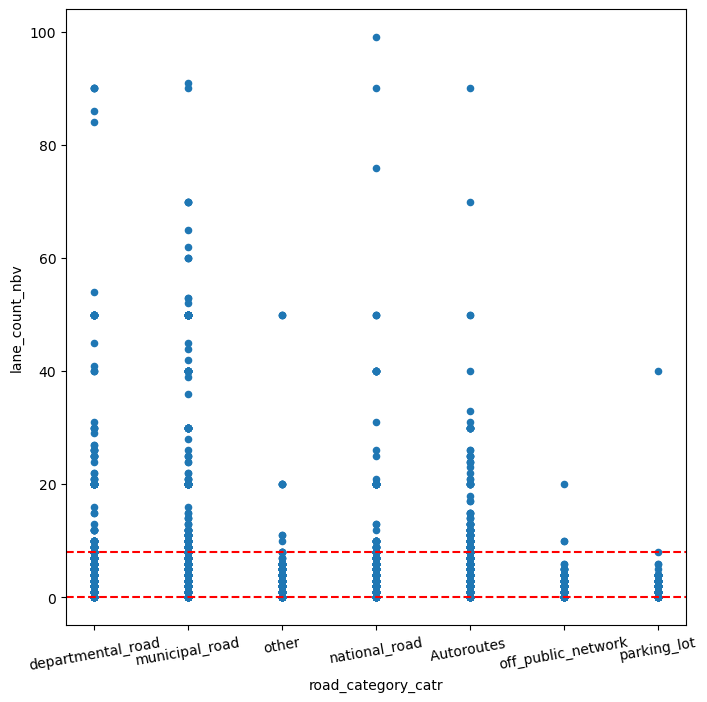

In [114]:
df_main.plot(kind='scatter', x='road_category_catr', y='lane_count_nbv')
plt.xticks(rotation=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

#AP: added horizontal lines for y=0 (min lanes) & y=8 (max lanes I'll allow)

No specific road type I can inveestigate for high or 0 lane count.

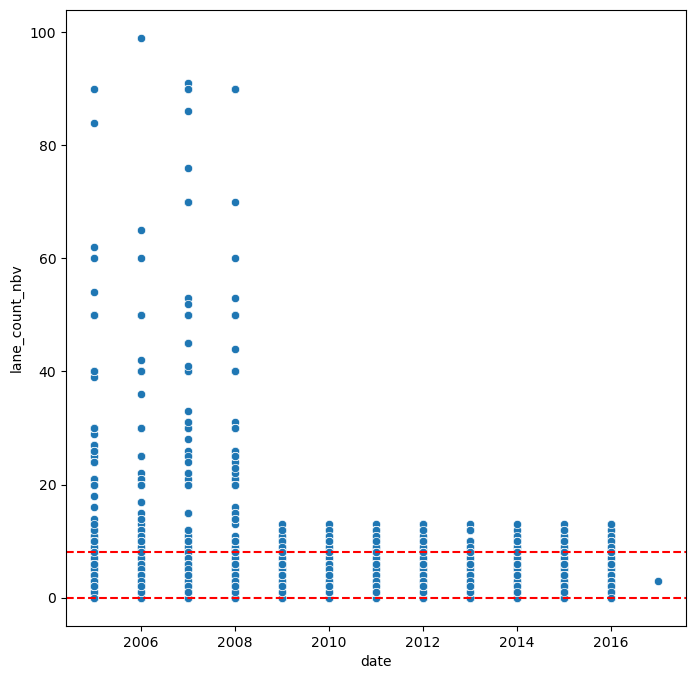

In [115]:
sns.scatterplot(data=df_main, x=df_main['date'].dt.year, y=df_main['lane_count_nbv'])
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

~2008 & ealier have the high values. Check to see the range of values for 2009 & later in order to figure out what I could replace the high values with~

Will be dropping rows with >8 lanes, accounts for <0.5% of total data

**AP: Seems that there's a 2017 year, probably just have to drop that single row**
#### Drop 2017 row

In [116]:
df_main[df_main['date'].dt.year == 2017].index

Index([19376], dtype='int64')

In [117]:
df_main.drop(df_main[df_main['date'].dt.year == 2017].index, inplace=True)

In [118]:
df_main[df_main['date'].dt.year == 2017].index

Index([], dtype='int64')

~AP: Starting at 2009, I want to see what the max value for lane count is~

#### Drop rows with >8 lanes

converting prior used cells to raw so they don't eecute and I can keep the code for later reference.|

~What kind of locations are these high number lanes?~

In [119]:
df_main.drop(df_main[df_main['lane_count_nbv'] > 8].index, axis=0, inplace=True)

In [120]:
df_main['lane_count_nbv'].value_counts(dropna=False).sort_index()

lane_count_nbv
0    102490
1    100385
2    459119
3     65954
4     75772
5      7771
6     13377
7       824
8      2050
Name: count, dtype: int64

AP: It is unclear (even from official documentation) whether lanes include ramps for highways. I am deciding to leave this as is.

#### Check zero lane roads

In [121]:
df_main[df_main['lane_count_nbv'] == 0].sample(5)

,acc_id,luminosity_lum,built_up_agg,intersection_type_int,weather_atm,collision_type_col,road_category_catr,road_type_circ,lane_count_nbv,reserved_lane_type_vosp,road_slope_prof,road_curvature_plan,central_sep_width_lartpc,road_width_larrout,surface_cond_surf,infrastructure_infra,crash_location_situ,ped_present,hour,date,day_of_week,is_weekend,is_weekday,is_holiday
701580,200600042663,lum_full_day,False,x_intersection,normal,two_cars_side,departmental_road,two_way,0,no_reserved_lane,dish,straight,0,47,dry,none,road,0,13,2006-07-17 13:00:00,Monday,False,True,False
683382,200600024465,lum_full_day,False,out_of_intersection,normal,two_cars_side,departmental_road,seperated_carriageway,0,no_reserved_lane,hill_top,straight,100,0,dry,none,road,0,15,2006-05-21 15:00:00,Sunday,True,False,False
448504,200900023984,lum_full_day,False,out_of_intersection,normal,two_cars_rear,national_road,two_way,0,no_reserved_lane,dish,straight,90,0,dry,none,road,0,18,2009-08-07 18:00:00,Friday,False,True,False
81100,201500024352,lum_full_day,True,t_intersection,normal,other,municipal_road,other,0,no_reserved_lane,other,other,0,0,other,none,none,1,8,2015-05-06 08:00:00,Wednesday,False,True,False
25099,201600025881,lum_night_yes_light,True,out_of_intersection,normal,no_collision,other,other,0,no_reserved_lane,other,other,0,0,other,none,none,0,0,2016-07-10 00:00:00,Sunday,True,False,False


Plot value counts for cols corresponding to road type characteristics for lanes = 0

In [122]:
for col in ['built_up_agg', 'intersection_type_int', 'road_category_catr', 'road_type_circ', 'reserved_lane_type_vosp', 'central_sep_width_lartpc', 'road_width_larrout', 'infrastructure_infra']:
    print(df_main[df_main['lane_count_nbv'] == 0][col].value_counts().sort_values(ascending=False))
    print()

built_up_agg
True     60340
False    42150
Name: count, dtype: int64

intersection_type_int
out_of_intersection    80722
x_intersection          8019
t_intersection          5296
roundabout              3091
other                   2383
place                   1123
y_intersection           860
4+_intersection          845
level_crossing           151
Name: count, dtype: int64

road_category_catr
departmental_road     43909
municipal_road        39812
national_road          7940
other                  3705
Autoroutes             3540
parking_lot            3093
off_public_network      491
Name: count, dtype: int64

road_type_circ
two_way                  66896
other                    16917
one_way                  10550
seperated_carriageway     7442
variable_assignment        685
Name: count, dtype: int64

reserved_lane_type_vosp
no_reserved_lane    98502
reserved_lane        1877
bike_path            1384
bike_parking          727
Name: count, dtype: int64

central_sep_width_lartpc
0

C:\Users\apez9\Anaconda\envs\Springboard\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\apez9\Anaconda\envs\Springboard\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\apez9\Anaconda\envs\Springboard\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\apez9\Anaconda\envs\Springboard\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

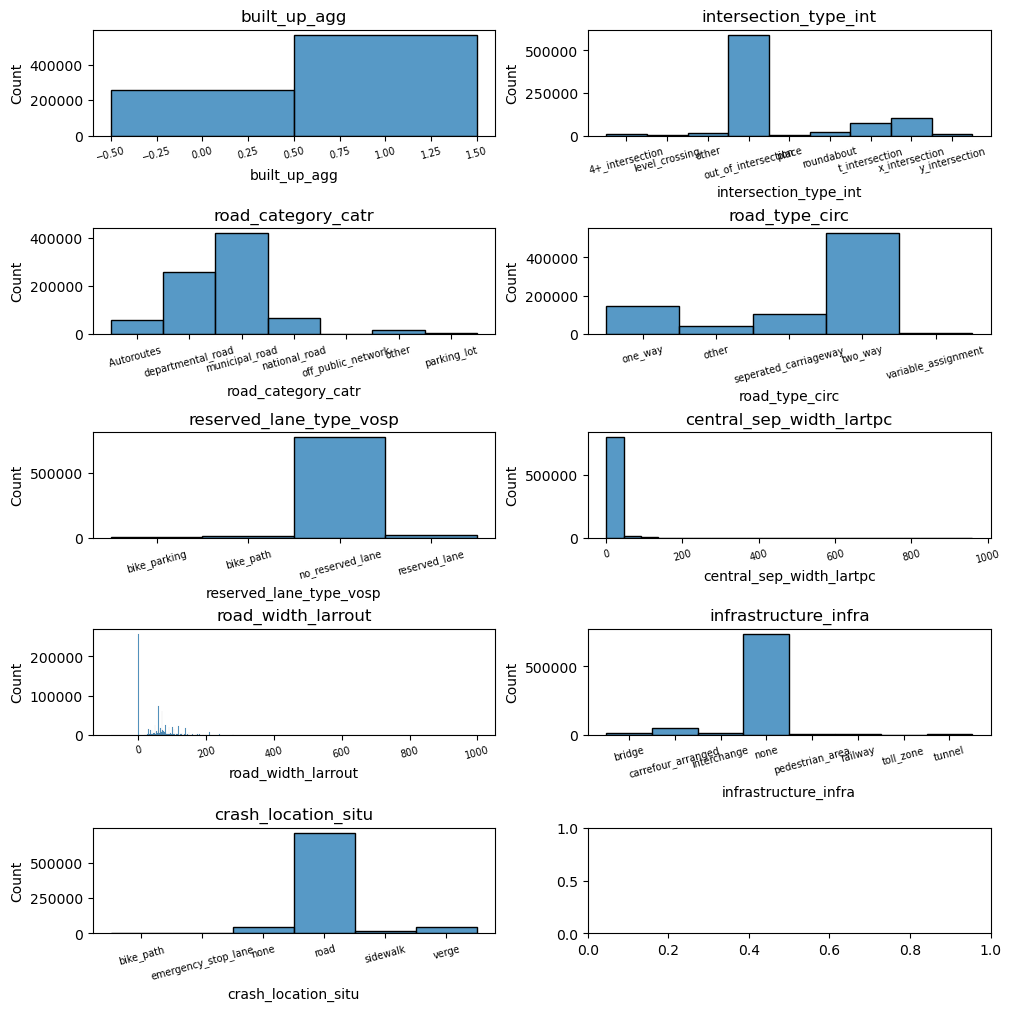

In [123]:
warnings.filterwarnings('ignore')

columns_to_plot = ['built_up_agg', 'intersection_type_int', 'road_category_catr', 'road_type_circ', 'reserved_lane_type_vosp', 'central_sep_width_lartpc', 'road_width_larrout', 'infrastructure_infra', 'crash_location_situ']
n_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10), layout="constrained")
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df_main[col], kde=False, ax=axes[i])
    axes[i].set_title(col)
    #axes[i].set_xlabel('')  # Remove x-axis labels for clarity if needed
    #xes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=15, labelsize=7)
#plt.tight_layout()
plt.show()

warnings.resetwarnings()

Majority characteristics for 0-lane roads:
- In built up areas
    - (built_up_agg = True)
- Out of intersection
    - intersection_type_int = out_of_intersection
    - Implies either off a road or on stretch of road without intersection
- municipal road type & departmental road
    - road_category_catr = municipal_road OR departmental_road
    - essentially a county road
    - departmental road is essentially a toll-free highway
- Two way road
    - road_type_circ = two_way
- No reserved lane
    - reserved_lane_type_vosp = no_reserved_lane
- no central separator in road
    - central_sep_width_lartpc = 0
- Majority of roads have a width of 0
    - road_width_larrout = 0
    - Strongly suggests this feature as the next to investigate for consistent and expected values
- No infrastructure
    - infrastructure_infra = none

**Plan for replacing 0's :**

base it off of road_type_circ col

2 lanes if road type is two_way, seperated_carrageway, other, or variable_assignment

1 lanes if road type is one_way

In [124]:
df_main[df_main['lane_count_nbv']==0]['lane_count_nbv'].value_counts(dropna=False).sort_index()

lane_count_nbv
0    102490
Name: count, dtype: int64

In [125]:
df_main.loc[
    (df_main['road_type_circ'] == 'one_way') & 
    (df_main['road_category_catr'] == 'municipal_road') &
    (df_main['lane_count_nbv'] == 0),
    'lane_count_nbv'
] = 1

In [126]:
df_main[df_main['lane_count_nbv']==0]['lane_count_nbv'].value_counts(dropna=False).sort_index()

lane_count_nbv
0    95424
Name: count, dtype: int64

In [127]:
df_main.loc[(df_main['lane_count_nbv'] == 0) &
    ((df_main['road_type_circ'].isin(['two_way', 'seperated_carrageway', 'other', 'variable_assignment'])) 
    or )

    'lane_count_nbv'
] = 2

In [128]:
df_main[df_main['lane_count_nbv']==0]['lane_count_nbv'].value_counts(dropna=False).sort_index()

lane_count_nbv
0    10926
Name: count, dtype: int64

In [132]:
df_main[df_main['lane_count_nbv']==0]['road_category_catr'].value_counts(dropna=False)

road_category_catr
Autoroutes            3129
departmental_road     3119
national_road         2190
municipal_road        1831
other                  431
parking_lot            182
off_public_network      44
Name: count, dtype: int64

# AP: Bookmark

There's still 10926 0 lane rows.

I want to make sure their for applicable situations.

In [ ]:
warnings.filterwarnings('ignore')

sns.swarmplot(data=df_main[df_main['lane_count_nbv']==0][num_cols + ['road_category_catr']], x='road_category_catr')

warnings.resetwarnings()

## Drop more columns
Note to self to check later if these col drops can be moved earlier in the code without causing errors.

- acc_id
- collision_type_col
    - would be useful if predicting severity of crash. Currently just interested in if specific location or conditions would have high crash probability
- crash_location_situ
    - post-crash info. would be potentially useful if predicting severity of crash.

In [ ]:
df_main.drop(columns=['acc_id', 'collision_type_col', 'crash_location_situ'], inplace=True)

In [ ]:
df_main.columns

In [ ]:
##reset index, mostly as a just-in-case. Looks fine from doing df.head(), just want to be sure
df_main.reset_index(drop=True, inplace=True)

In [ ]:
df_main.tail()

## A check before doing Full EDA

In [ ]:
df_main.head()

In [ ]:
df_main.info()

# EDA

Hypotheses:
- majority of crashes occur for:
    - conditions:
        - no light
        - bad weather (heavy rain, storm)
        - common slippery surface conditions (ice, snowy, wet)
    - road types:
        - built-up
        - out_of_intersection
        - Municipal road type
        - two-way road
        - 

Note: Encode categorical features with pd.get_dummies in next notebook. Doing in this NB would make EDA more difficult.